# Analyse og visualisering av værdata

Denne notebooken analyserer og visualiserer værdata hentet fra API-data lagret i `miljødata.json`. Fokus ligger på:
- Temperatur, vindhastighet, nedbør og lufttrykk over tid
- Statistisk beskrivelse av temperatur og lufttrykk
- Visualiseringer med både Matplotlib og Seaborn


In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


In [8]:
with open("data/miljodata.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Henter timeserien
timeseries = data["properties"]["timeseries"]

# Lister for data
times, temps, wind_speeds, precipitations, pressures = [], [], [], [], []

for entry in timeseries:
    time = datetime.fromisoformat(entry["time"].replace("Z", "+00:00"))
    details = entry["data"]["instant"]["details"]
    
    temp = details.get("air_temperature")
    wind = details.get("wind_speed")
    press = details.get("air_pressure_at_sea_level")
    precip = entry["data"].get("next_1_hours", {}).get("details", {}).get("precipitation_amount", 0)
    
    if temp is not None and press is not None:
        times.append(time)
        temps.append(temp)
        wind_speeds.append(wind)
        precipitations.append(precip)
        pressures.append(press)

# Lager DataFrame
df = pd.DataFrame({
    "Time": pd.to_datetime(times),
    "Temperature (°C)": temps,
    "Wind Speed (m/s)": wind_speeds,
    "Precipitation (mm)": precipitations,
    "Pressure (hPa)": pressures
})
df = df.sort_values("Time")


C:\Users\brage\AppData\Local\Temp\ipykernel_22356\3090596746.py:31: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\brage\AppData\Local\Temp\ipykernel_22356\3090596746.py:31: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
c:\Users\brage\OneDrive\Dokumenter\GitHub\MappeDel1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\brage\OneDrive\Dokumenter\GitHub\MappeDel1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


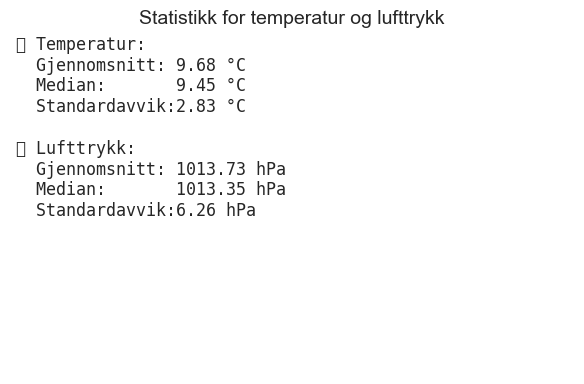

In [9]:
# Beregner statistikk
stats = {
    "Temperatur": {
        "Gjennomsnitt": np.mean(df["Temperature (°C)"]),
        "Median": np.median(df["Temperature (°C)"]),
        "Std": np.std(df["Temperature (°C)"])
    },
    "Lufttrykk": {
        "Gjennomsnitt": np.mean(df["Pressure (hPa)"]),
        "Median": np.median(df["Pressure (hPa)"]),
        "Std": np.std(df["Pressure (hPa)"])
    }
}

# Tekstbasert visning
stats_text = (
    "🔴 Temperatur:\n"
    f"  Gjennomsnitt: {stats['Temperatur']['Gjennomsnitt']:.2f} °C\n"
    f"  Median:       {stats['Temperatur']['Median']:.2f} °C\n"
    f"  Standardavvik:{stats['Temperatur']['Std']:.2f} °C\n\n"
    "🔵 Lufttrykk:\n"
    f"  Gjennomsnitt: {stats['Lufttrykk']['Gjennomsnitt']:.2f} hPa\n"
    f"  Median:       {stats['Lufttrykk']['Median']:.2f} hPa\n"
    f"  Standardavvik:{stats['Lufttrykk']['Std']:.2f} hPa"
)

plt.figure(figsize=(6, 4))
plt.axis("off")
plt.text(0.01, 0.99, stats_text, ha="left", va="top", fontsize=12, family="monospace")
plt.title("Statistikk for temperatur og lufttrykk", fontsize=14)
plt.tight_layout()
plt.show()


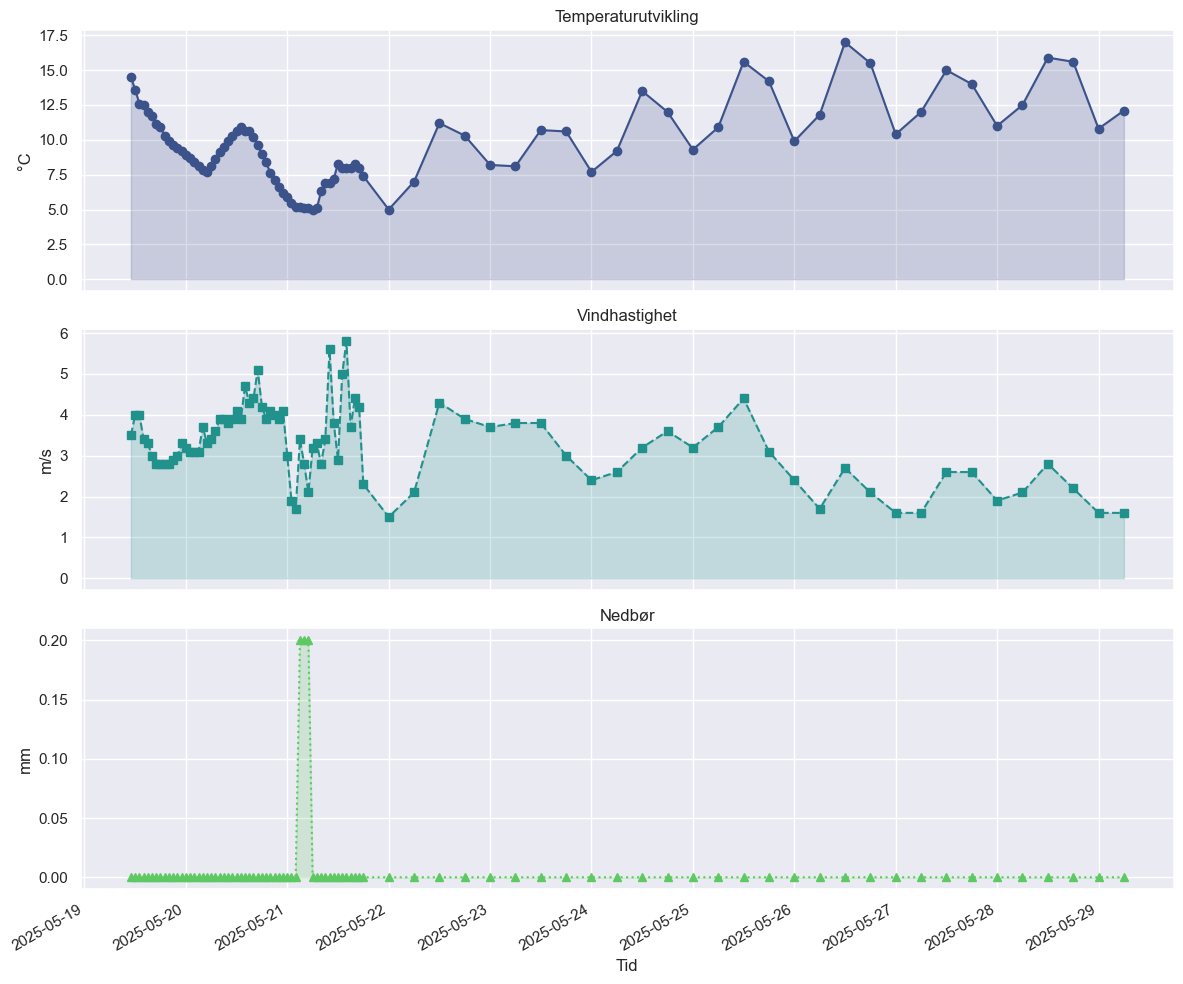

In [10]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
colors = sns.color_palette("viridis", 3)

# Temperatur
axes[0].plot(df["Time"], df["Temperature (°C)"], marker="o", linestyle="-", color=colors[0])
axes[0].fill_between(df["Time"], df["Temperature (°C)"], alpha=0.2, color=colors[0])
axes[0].set_title("Temperaturutvikling")
axes[0].set_ylabel("°C")

# Vind
axes[1].plot(df["Time"], df["Wind Speed (m/s)"], marker="s", linestyle="--", color=colors[1])
axes[1].fill_between(df["Time"], df["Wind Speed (m/s)"], alpha=0.2, color=colors[1])
axes[1].set_title("Vindhastighet")
axes[1].set_ylabel("m/s")

# Nedbør
axes[2].plot(df["Time"], df["Precipitation (mm)"], marker="^", linestyle=":", color=colors[2])
axes[2].fill_between(df["Time"], df["Precipitation (mm)"], alpha=0.2, color=colors[2])
axes[2].set_title("Nedbør")
axes[2].set_ylabel("mm")
axes[2].set_xlabel("Tid")

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


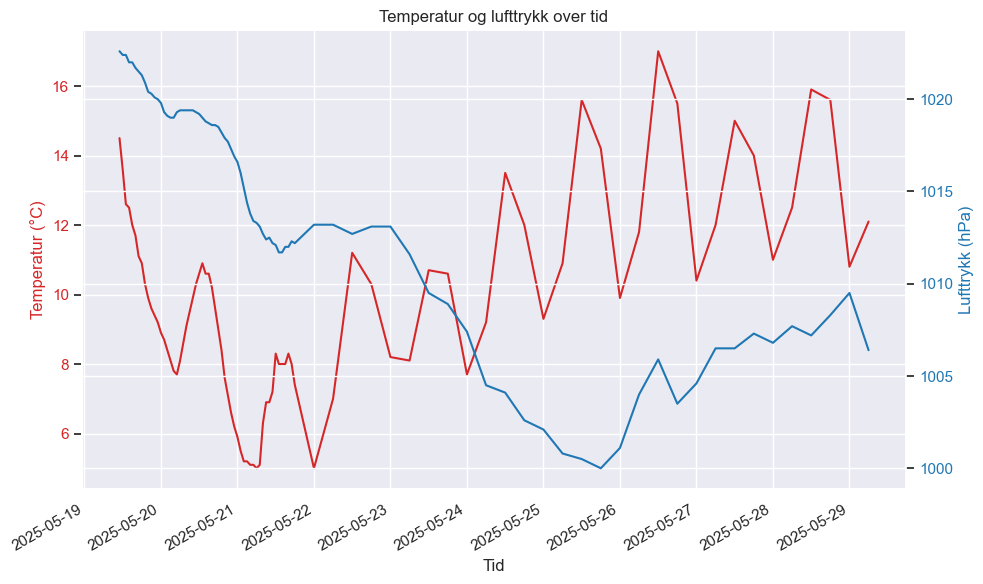

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Tid')
ax1.set_ylabel('Temperatur (°C)', color='tab:red')
ax1.plot(df["Time"], df["Temperature (°C)"], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Lufttrykk (hPa)', color='tab:blue')
ax2.plot(df["Time"], df["Pressure (hPa)"], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Temperatur og lufttrykk over tid")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()


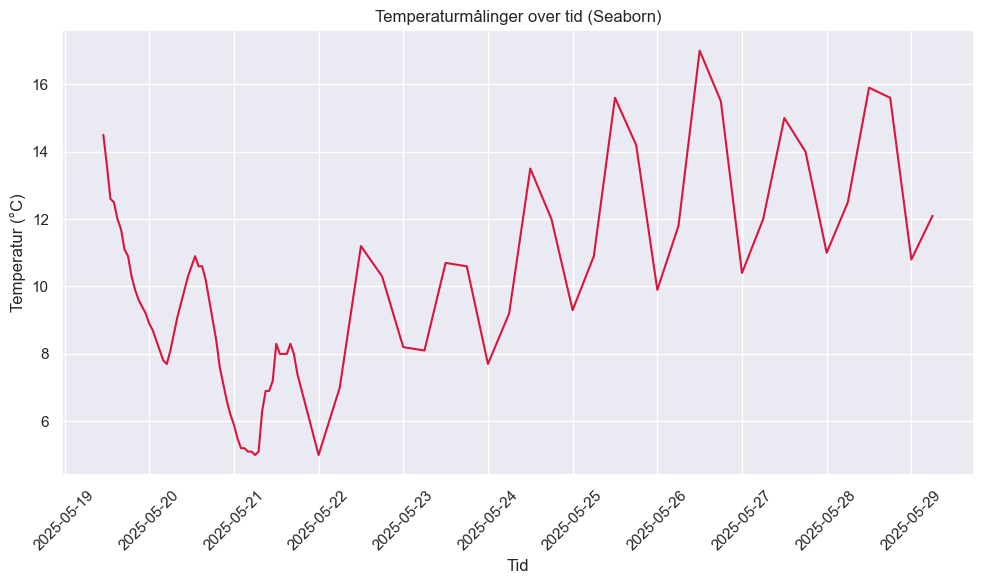

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Time"], y=df["Temperature (°C)"], color="crimson")
plt.title("Temperaturmålinger over tid (Seaborn)")
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Konklusjon

- Temperatur, vind og nedbør viser tydelige variasjoner over tid.
- Lufttrykket er mer stabilt, men viser også små endringer.
- Statistisk analyse gir innsikt i dataspredning og sentraltendens.
- Kombinert visualisering gjør det lettere å sammenligne værfaktorer.

Notebooken gir en god grunnmur for videre analyse, maskinlæring eller datamodellering basert på værdata.
